In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')
gender_submission = pd.read_csv('/gender_submission.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check missing values
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#sumarize missing values in each column
train_data.isnull() .sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#sumarize missing values in each column
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

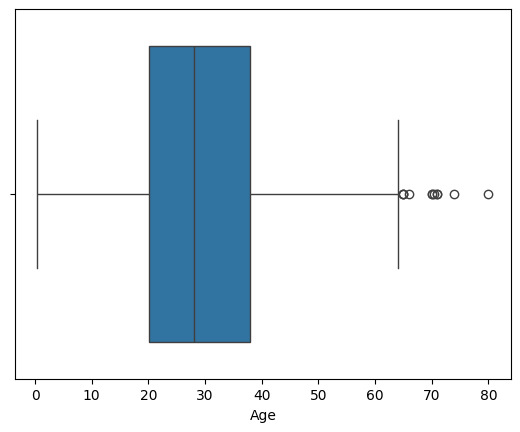

In [ ]:
#create a box plot to visualize potential outliers
sns.boxplot(x=train_data['Age'])
plt.show()

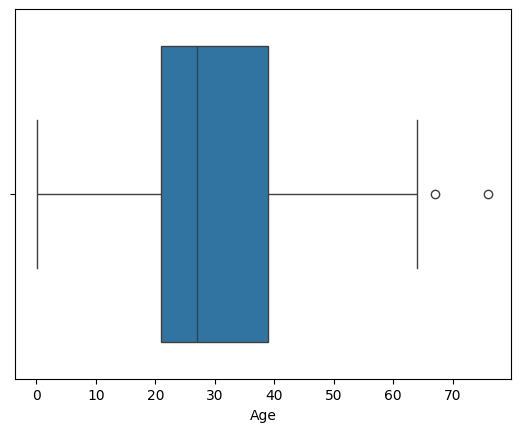

In [ ]:
#create a box plot to visualize potential outliers
sns.boxplot(x = test_data['Age'])
plt.show()

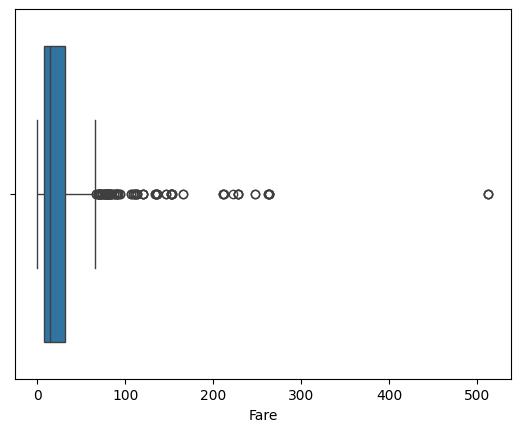

In [ ]:
#create a box plot to visualize potential outliers
sns.boxplot(x=train_data['Fare'])
plt.show()

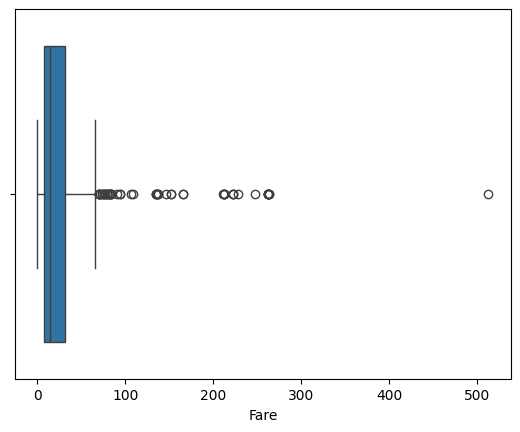

In [ ]:
#create a box plot to visualize potential outliers
sns.boxplot(x=test_data['Fare'])
plt.show()

In [ ]:
#replace missing values in a age with the mean of the column
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [ ]:
#replace missing values in a fare with the mean of the column
train_data['Fare'].fillna(train_data['Fare'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [ ]:
#cabin has alot of missing values so lets removw the null values from cabin
train_data.drop(columns=['Cabin'],inplace=True)
test_data.drop(columns=['Cabin'],inplace=True)

In [ ]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
#Embarked is a categorical variable, we will replace any missing values
train_data['Embarked'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Embarked'].fillna(test_data['Age'].mean(),inplace=True)

In [ ]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std =np.std(data)


  for i in data:
    z_score= (i- mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers

In [ ]:
from scipy import stats

#calculate the z-score for a column
z_scores = stats.zscore(train_data['Age'])

#identify outliers based on z-score thresgold
outlier_indices =(z_scores > 3 ) |(z_scores < -3)

In [ ]:
cleaned_titanic_df = train_data[~outlier_indices]

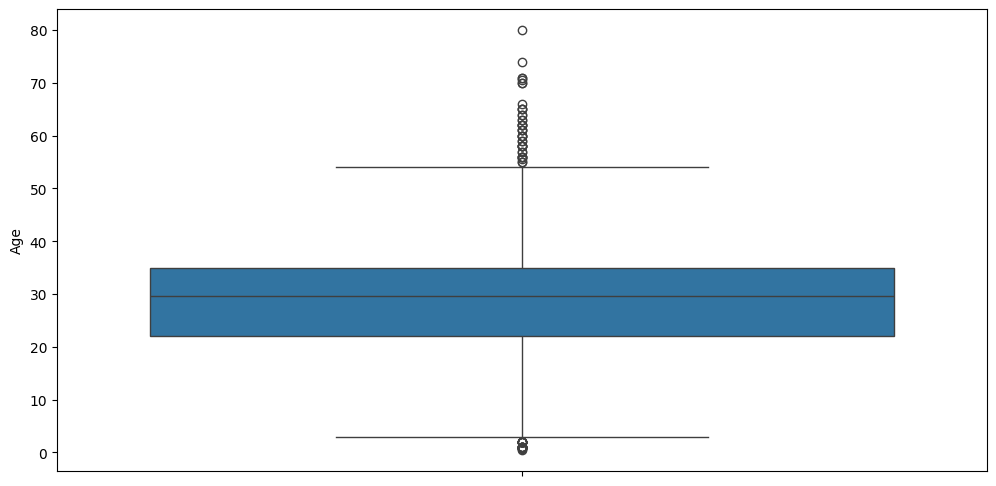

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data = train_data['Age'])
plt.xticks(rotation=45)
plt.show()